# Section 1: Data Preparation

We’ll be using the train.csv data set for this lab. The data set covers the characteristics and prices for
used cars sold in India.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**1) Import data and examine a few rows.**

In [16]:
dataset = pd.read_csv('train.csv')
print(dataset.head())

                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 

**2) Look at the data types of the variables using dtypes.**

In [17]:
print(dataset.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object


**3) To use them in a model, we need Engine and Power to be numeric. To make them numeric, you will need to strip out the text characters and convert the data type to numeric. Use the following code:**

a. df1["Engine"] = df1["Engine"].str.rstrip(" CC")

b. df1["Power"] = df1["Power"].str.rstrip(" bhp")

c. df1["Power"] = df1["Power"].replace(regex="null", value = np.nan)

d. df1["Power"] = df1["Power"].astype("float")

e. df1["Engine"] = df1["Engine"].astype("float")

In [18]:
dataset['Engine'] = dataset['Engine'].str.rstrip('CC')
dataset['Power'] = dataset['Power'].str.rstrip('bhp')
dataset['Power'] = dataset['Power'].replace(regex = 'null', value = np.nan)
dataset['Power'] = dataset['Power'].astype('float')
dataset['Engine'] = dataset['Engine'].astype('float')
print(dataset.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
New_Price             object
Price                float64
dtype: object


**4) Compute some summary statistics of the variables using describe(). Notice that the object variables do not appear in the describe() output. What do you notice when you examine the summary statistics?** 

*Hint: Look at the counts and compare means with medians.*

In [19]:
print(dataset.describe())

              Year  Kilometers_Driven       Engine        Power        Seats  \
count  6019.000000       6.019000e+03  5983.000000  5876.000000  5977.000000   
mean   2013.358199       5.873838e+04  1621.276450   113.253050     5.278735   
std       3.269742       9.126884e+04   601.355233    53.874957     0.808840   
min    1998.000000       1.710000e+02    72.000000    34.200000     0.000000   
25%    2011.000000       3.400000e+04  1198.000000    75.000000     5.000000   
50%    2014.000000       5.300000e+04  1493.000000    97.700000     5.000000   
75%    2016.000000       7.300000e+04  1984.000000   138.100000     5.000000   
max    2019.000000       6.500000e+06  5998.000000   560.000000    10.000000   

             Price  
count  6019.000000  
mean      9.479468  
std      11.187917  
min       0.440000  
25%       3.500000  
50%       5.640000  
75%       9.950000  
max     160.000000  


The counts are different from each other shows that there exsits some missing values in categories like 'Engine', 'Power' and 'Seats'. The differences between mean and median(50%) indicates that the distribution may not be normal.

**5) Because describe() will not provide information about the object variables, you will need to check whether there is missing data in those using a different method. Which variable had the most missing values?**

In [20]:
print(dataset.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64


From the results above, 'New_Price' has the most missing values.

**6) Use pairplot() to examine the distributions and scatterplots of these variables. Do you see potential problems such as non-normal or potentially correlated data?**

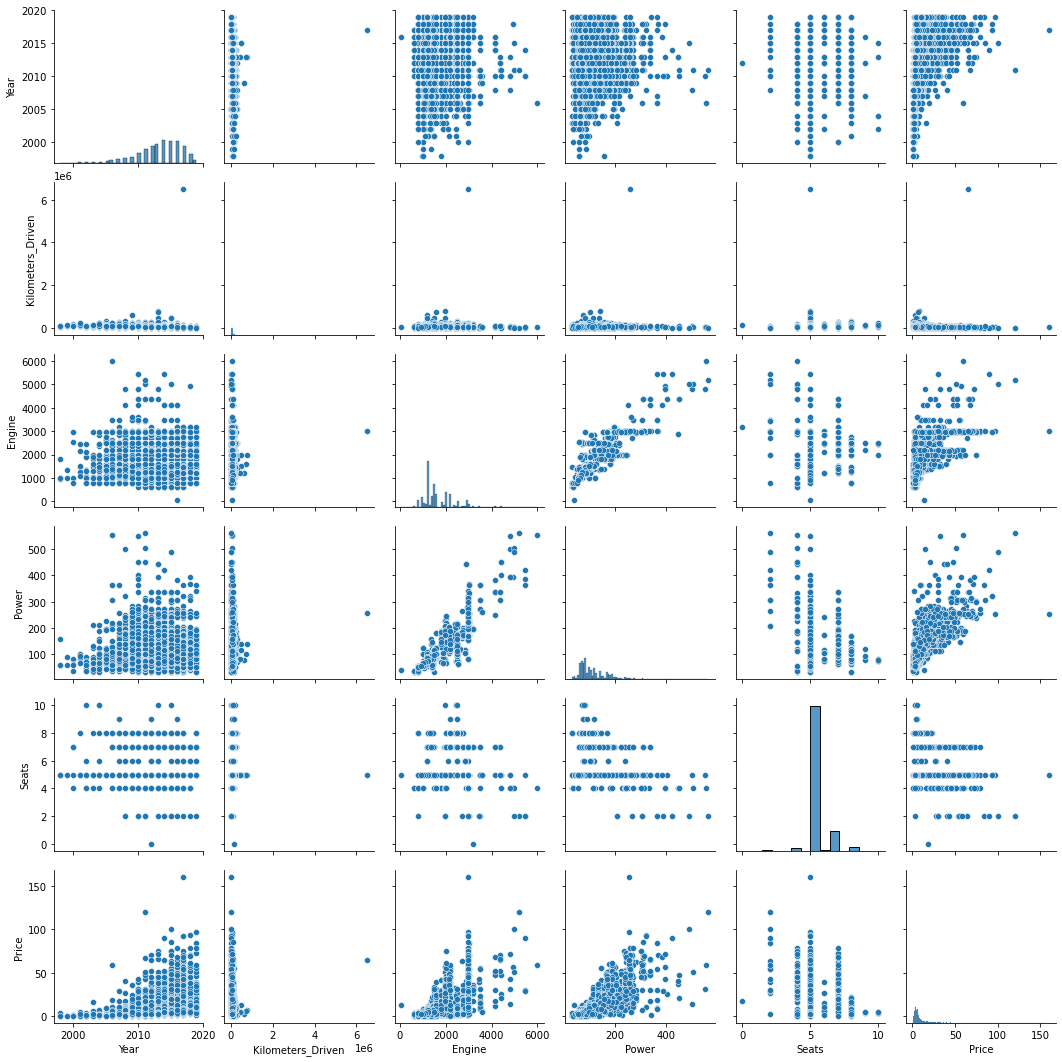

In [21]:
sns.pairplot(dataset)
plt.show()

Engine and Power may have a positive correlation, while the year, power and price seems having potential non-normal problem.

**7) Transform Price so that it looks more normal, then create a new plot of the transformed variable.**

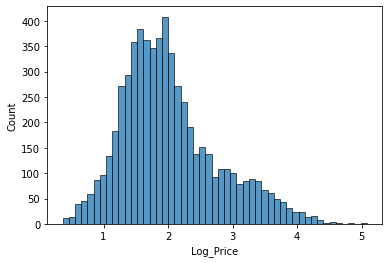

In [22]:
dataset['Log_Price'] = np.log1p(dataset['Price'])

sns.histplot(dataset['Log_Price'])
plt.show()

# Section 2: Predicting Used Car Prices

We are interested in predicting the price of a car given Power, Engine, Kilometers Driven, and Year. We will attempt to build a linear regression model of Price.

**1) Build a model of transformed price based on the other 4 variables. Be sure to examine both the output and the notes. You will get an error if any of the covariates have missing values.**

*Hint: Only drop rows which have missing values in the variables you are using for the model.*

**a. How much variance is explained?**

In [37]:
dataset = dataset.dropna(subset = ['Power', 'Engine', 'Kilometers_Driven', 'Year'])
X = dataset[['Power', 'Engine', 'Kilometers_Driven', 'Year']]
X = sm.add_constant(X)
y = dataset['Log_Price']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     7142.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:47:06   Log-Likelihood:                -1392.8
No. Observations:                5876   AIC:                             2796.
Df Residuals:                    5871   BIC:                             2829.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -218.4999      2.61

/Users/wry/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The result can be indentified by the R square value in the table.

**b. How many observations were used to fit the model?**

5876, the answer can be indentified by 'No. Observations' in the table.

**2) Based on your plots and the note about condition indices in the output, multicollinearity may be a problem. Compute the VIF of each variable. Which variables does it show are correlated?**

In [38]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

            Features            VIF
0              const  425843.625194
1              Power       4.115131
2             Engine       4.156524
3  Kilometers_Driven       1.042054
4               Year       1.051550


The result of vif value shows that power and engine may have a multicollinearity.

**3) Dimensionality reduction through PCA is one way to manage collinear variables. Use PCA to create principal components and create a scree plot. For this example, which criteria would you use to determine the number of components to use: proportion of variance, eigenvalues > 1, or elbow on the plot?**

<AxesSubplot:>

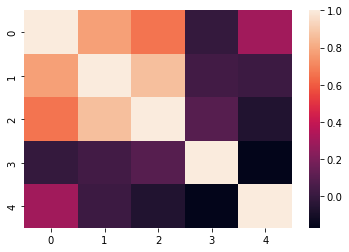

In [42]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(dataset[['Price','Power', 'Engine', 'Kilometers_Driven', 'Year']]))
sns.heatmap(scaled_data.corr())

In [43]:
pca = PCA(n_components = 5)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.681508,0.768437,-0.338833,0.556794,0.078965
1,0.280016,-0.516062,0.145074,0.041550,-0.169765
2,-0.999369,0.418090,-0.460997,0.382012,-0.117700
3,-0.835896,0.448451,0.076592,0.327422,-0.066424
4,1.013290,-0.005867,-0.279566,0.211707,0.136811


<AxesSubplot:>

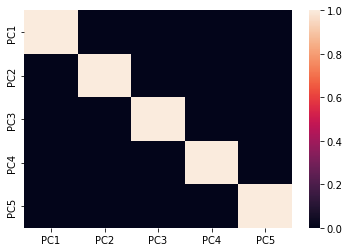

In [44]:
sns.heatmap(data_pca.corr())

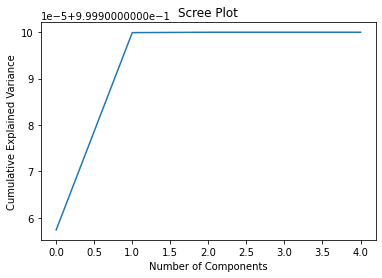

In [25]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

Proportion of Variance: Choose the number of components that explain a certain percentage of the variance (e.g., 95%).

Eigenvalues > 1: This rule suggests selecting all components with eigenvalues greater than one.

Elbow on the plot: Choose the point where the curve starts to level off (elbow point).

**4) Create/select 2 components and rerun the regression with transformed price. What is the amount of variance explained?**

**a. When merging the transformed price onto the principal components dataframe, you will likely need to reset the index.**

**b. principalDf = pd.concat([principalDf, df1['lnPrice'].reset_index(drop=True)], axis = 1)**

In [26]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalDf = pd.concat([principalDf, dataset['Log_Price'].reset_index(drop=True)], axis=1)

X_new = principalDf[['PC1', 'PC2']]
X_new = sm.add_constant(X_new)
y_new = principalDf['Log_Price']

model_new = sm.OLS(y_new, X_new).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     2979.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:18:10   Log-Likelihood:                -4533.0
No. Observations:                5876   AIC:                             9072.
Df Residuals:                    5873   BIC:                             9092.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0342      0.007    297.872      0.0

/Users/wry/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The R-squared value from this output will indicate the variance explained using the principal components.

**5) What is the VIF of the components?**

In [27]:
vif_pca = pd.DataFrame()
vif_pca["Features"] = X_new.columns
vif_pca["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
print(vif_pca)

  Features  VIF
0    const  1.0
1      PC1  1.0
2      PC2  1.0
